# setting up

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# getting data

In [2]:
# experimental data
# this has the id and experimental data, but doesn't link the ids to anything
exdata = pd.read_csv("data/Frechter_2019_supp/Frechter_2019_odour_LH.csv")
# tidy up the ids
exdata.loc[:, ["tidy_id"]] = exdata.id.str.replace("nm20", "")
exdata

,id,group,functional.cell.type,OilBl,E2Hex,GerAc,Prpyl,IPenA,Et3HB,Nonnl,...,ClrBL,ClrB2,FlyFM,EtAmn,Ptscn,Lnlol,23BTD,Sprdn,CO21P,tidy_id
0,nm20140723c2,PN,D,-0.50,-3.00,2.25,0.50,-0.50,-1.00,4.25,...,0.50,1.50,0.00,-3.25,2.00,6.75,1.50,-1.00,0.25,140723c2
1,nm20140828c0,PN,D,1.75,10.00,1.00,7.00,10.00,4.50,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140828c0
2,nm20141029c0,PN,D,6.25,1.50,3.75,0.50,0.00,1.00,4.00,...,10.00,6.75,1.50,-5.25,1.00,15.50,1.50,8.50,9.50,141029c0
3,nm20160217c0,PN,D,0.75,1.25,4.25,0.75,0.00,2.25,6.50,...,0.25,1.50,0.75,-5.25,-0.25,2.00,2.50,4.25,0.00,160217c0
4,nm20160304c3,PN,D,2.00,0.50,1.25,-0.75,0.25,1.25,20.25,...,-2.00,4.75,0.75,-0.25,0.25,-3.00,0.25,0.75,NaN,160304c3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,nm20121013c0,O,9,1.00,18.75,29.25,22.75,6.50,34.75,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121013c0
402,nm20121016c0,O,9,4.00,57.50,29.50,22.00,22.50,39.00,29.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121016c0
403,nm20121029c1,O,9,2.00,33.00,30.25,42.50,12.75,39.75,25.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121029c1
404,nm20121030c0,O,9,6.50,36.00,36.75,39.00,21.00,43.50,43.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121030c0


In [3]:
# this links the ids above to the cell type and anatomy groups
neuron_meta = pd.read_csv("data/Frechter_2019_supp/elife-44590-supp3-v2.csv")
# map from id to cell type
nid_to_ctype = neuron_meta.set_index("id")["cell.type"].to_dict()
neuron_meta

,Unnamed: 0,cell.type,anatomy.group,pnt,tract,type,skeleton.type,coreLH,id,skeleton.type_pnt
0,130123c1,AD1a1,AD1a,AD1,,ON,DyeFill,TRUE,130123c1,DyeFill_AD1
1,130523c0,AD1a1,AD1a,AD1,,ON,DyeFill,TRUE,130523c0,DyeFill_AD1
2,130524c0,AD1a1,AD1a,AD1,,ON,DyeFill,TRUE,130524c0,DyeFill_AD1
3,Cha-F-000258,AD1a1,AD1a,AD1,,ON,FlyCircuit,TRUE,Cha-F-000258,FlyCircuit_AD1
4,L1739#1,AD1a1,AD1a,AD1,,ON,MCFO,TRUE,L1739#1,MCFO_AD1
...,...,...,...,...,...,...,...,...,...,...
2747,TL12L,VM7 iPN,AL_mALT,mALT,mALT,IN,FijiTracing,,TL12L,FijiTracing_mALT
2748,TL19L,VM7 iPN,AL_mALT,mALT,mALT,IN,FijiTracing,,TL19L,FijiTracing_mALT
2749,TL20L,VM7 iPN,AL_mALT,mALT,mALT,IN,FijiTracing,,TL20L,FijiTracing_mALT
2750,TL23L,VM7 iPN,AL_mALT,mALT,mALT,IN,FijiTracing,,TL23L,FijiTracing_mALT


In [4]:
# this maps from odour abbreviations to Cas numbers
odourcas = pd.read_csv("data/Frechter_2019_supp/odour_cas.csv")
odourcas = odourcas[~odourcas.Odor.isna()]
# and remove spaces in cas number
odourcas["CasN"] = odourcas.CasN.str.replace(" ", "")
odour_to_cas = odourcas.set_index("Odor")["CasN"].to_dict()
odourcas.head()

,Odor,CasN
0,1HxOl,111-27-3
1,bCitr,106-22-9
2,Lnlol,78-70-6
3,Frnsl,4602-84-0
4,E2Hex,6728-26-3


In [5]:
# this maps from cas numbers to odour full names
odour_meta = pd.read_csv("data/Frechter_2019_supp/odour_fullname.csv")
odour_meta["CAS"] = odour_meta.CAS.str.replace(" ", "")
odour_full_name = odour_meta.set_index("CAS")["Odorant"].to_dict()
odour_meta

,Odorant,CAS
0,ammonium hydroxide,1336-21-6
1,putrescine,110-60-1
2,cadaverine,462-94-2
3,g-butyrolactone,96-48-0
4,g-hexalactone,695-06-7
...,...,...
122,"1,4 Cynelole",470-67-7
123,Phenylacetic acid,103-82-2
124,Luvulinic acid,123-76-2
125,CVA,6186-98-7


In [6]:
# this maps odour abbreviations to different chemical groups
odour_group = pd.read_csv("data/Frechter_2019_supp/elife-44590-supp5-v2.csv")
odour_group.loc[:, ["cas"]] = odour_group.odor.map(odour_to_cas)
odour_group.loc[:, ["full_name"]] = odour_group.cas.map(odour_full_name)
# save
odour_group.to_csv("data/Frechter_2019_supp/tidy/odour_meta.csv", index=False)
# which ones have no fafb_meta information?
odour_group[odour_group.full_name.isna()]
# 5OdMx stands for 5 odour mix
# Vingr: vinegar
# VinGe: vinegar + geosmin
# OilBl: oil blank (control)
# WatBl: water blank (control)

,odor,aldehyde,carboxyl,alcohol,terpene/terpe0id,ester,ketone,phenyl,amine,min_acid,alkene,alkane,aromatic,cas,full_name
5,Frnsl,0,0,1,1,0,0,0,0,0,1,0,0,4602-84-0,NaN
23,HCL36,0,0,0,0,0,0,0,0,1,0,0,0,7647-01-0,NaN
24,Amnia,0,0,0,0,0,0,0,1,0,0,0,0,7664-41-7,NaN
26,Sprmn,0,0,0,0,0,0,0,1,0,0,1,0,71-44-3,NaN
27,EtAmn,0,0,0,0,0,0,0,1,0,0,1,0,75-04-7,NaN
28,Sprdn,0,0,0,0,0,0,0,1,0,0,1,0,124-20-9,NaN
30,Pyrdn,0,0,0,0,0,0,0,1,0,0,0,1,110-86-1,NaN
31,PEtAm,0,0,0,0,0,0,1,1,0,0,0,1,64-04-0,NaN


In [7]:
# how many ids in exdata is also in neuron_meta?
exdata.tidy_id.isin(neuron_meta["id"]).value_counts()

tidy_id
False    265
True     141
Name: count, dtype: int64

In [8]:
# shared between the two
shared = exdata[exdata.tidy_id.isin(neuron_meta["id"])]
# shared.to_csv('~/Downloads/shared.csv', index=False)
# not shared
not_shared = exdata[~exdata.tidy_id.isin(neuron_meta["id"])]
# not_shared.to_csv('~/Downloads/not_shared.csv', index=False)

exdata["cell_type"] = exdata.tidy_id.map(nid_to_ctype)
# save
exdata.to_csv("data/Frechter_2019_supp/tidy/exdata.csv", index=False)
exdata.cell_type.value_counts()

cell_type
AV6a1    13
AD1b1    11
PV5c1     9
PD2a2     8
PV5c2     8
PV5c3     6
PV5a1     6
AD1b2     5
PD2b1     5
PV4a7     5
PV5b1     4
PV4b2     4
AV4a1     4
AD1c1     4
PV5b2     4
AD1a4     4
AD1a2     3
AV4b5     3
PV4a4     3
PV4a6     3
PV5a2     3
AD1a1     3
AV4b8     3
AV4a5     3
PV4a3     2
AV4c1     2
PV4d1     2
PV2a1     2
PV4a2     2
PV4f1     1
PV4a5     1
PV4d3     1
PV4b1     1
PV2d1     1
PV2b1     1
PD2a1     1
Name: count, dtype: int64

In [9]:
# this anatomical cell type has a few functional cell types
exdata[exdata.cell_type == "AV6a1"]

,id,group,functional.cell.type,OilBl,E2Hex,GerAc,Prpyl,IPenA,Et3HB,Nonnl,...,ClrB2,FlyFM,EtAmn,Ptscn,Lnlol,23BTD,Sprdn,CO21P,tidy_id,cell_type
306,nm20130807c1,O,34,0.00,0.5,0.5,0.0,2.50,0.5,2.5,...,2.5,1.50,0.5,0.0,1.0,19.5,0.0,NaN,130807c1,AV6a1
307,nm20130808c2,O,34,0.00,27.5,26.0,17.0,10.75,21.0,18.0,...,8.5,21.50,20.5,16.5,14.0,31.5,16.5,NaN,130808c2,AV6a1
308,nm20130813c0,O,34,0.50,11.5,10.5,5.0,7.00,14.5,9.0,...,4.5,2.00,0.0,0.0,2.5,23.0,0.5,NaN,130813c0,AV6a1
309,nm20130815c1,O,34,0.00,26.0,15.5,6.0,19.00,21.0,4.5,...,4.0,0.00,1.0,0.0,2.0,22.0,0.5,NaN,130815c1,AV6a1
311,nm20130820c0,O,34,0.00,0.0,3.0,0.0,4.00,5.0,1.5,...,0.0,3.50,0.0,0.0,0.5,1.5,0.0,NaN,130820c0,AV6a1
312,nm20130820c2,O,34,0.00,0.5,0.0,0.5,2.00,0.5,1.0,...,0.0,0.00,3.0,0.0,0.0,4.0,0.0,NaN,130820c2,AV6a1
313,nm20130822c0,O,34,0.00,15.0,2.0,2.0,3.00,2.0,5.5,...,5.0,0.50,10.5,0.0,4.0,12.0,12.5,14.0,130822c0,AV6a1
364,nm20140328c1,O,61,-0.25,10.0,11.0,0.0,-0.75,0.5,32.5,...,7.5,17.00,19.0,3.5,4.0,4.5,2.0,0.5,140328c1,AV6a1
365,nm20140402c1,O,61,0.00,6.5,1.5,0.5,0.50,0.0,4.5,...,9.5,27.50,23.0,8.0,4.5,0.5,0.5,13.5,140402c1,AV6a1
366,nm20140514c2,O,61,0.50,4.5,7.0,0.5,1.50,4.5,18.0,...,10.5,27.50,21.5,4.5,3.5,2.0,7.5,1.0,140514c2,AV6a1


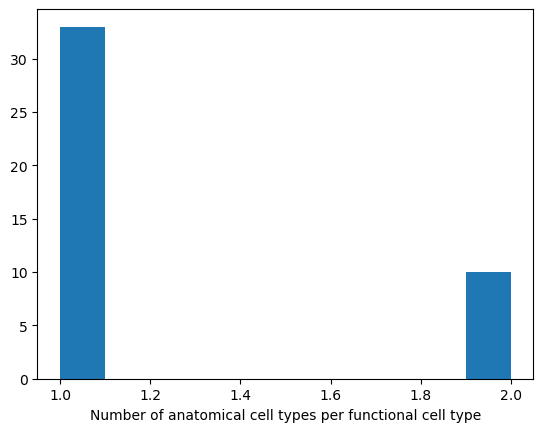

In [10]:
# within each functional cell type, as figure 4 shows, there's a variation on the responsiveness of each cell in the same type
nfuncctype_per_ctype = exdata.groupby("cell_type")[
    "functional.cell.type"
].nunique()
nctype_per_funcctype = (
    exdata[~exdata.cell_type.isna()]
    .groupby("functional.cell.type")["cell_type"]
    .nunique()
)
plt.hist(nctype_per_funcctype)
plt.xlabel("Number of anatomical cell types per functional cell type")
plt.show()

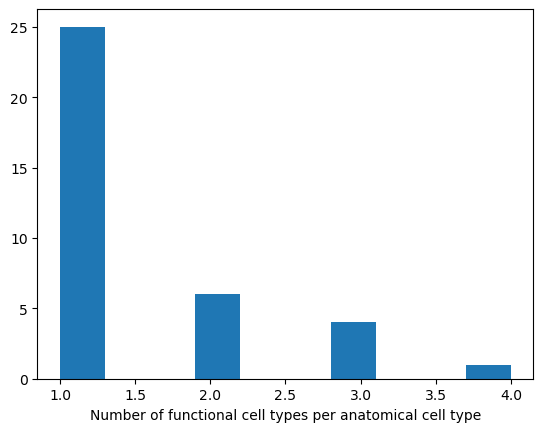

In [11]:
plt.hist(nfuncctype_per_ctype)
plt.xlabel("Number of functional cell types per anatomical cell type")
plt.show()